In [28]:
# importing required libraries
import torch.nn as nn
import torch
import torch.nn.functional as F
import math,copy,re
import warnings
import os
## plase change to folder path
working_dir = "/home/zhuoyan/nlp/Induction-Head"
# working_dir = "/Users/zyxu/Documents/py/NLP/induction_head/induc_head"
os.chdir(working_dir)
import json 
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from src.config import Config
from src.model.tinyGPT2 import tinyGPT2LMHeadModel
from src.data.gen_simple import gen_simple_data
from src.utils import fix_random_seed, create_folder
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


from transformers import GPT2Config


In [29]:
tinymodel = tinyGPT2LMHeadModel.from_pretrained("model_output")

In [30]:
tinymodel

tinyGPT2LMHeadModel(
  (transformer): tinyGPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-1): 2 x tinyGPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [31]:
model = tinymodel.transformer
d_model = 768

In [32]:
layer = 1
num_heads = 1
W_q, W_k, _ = model.h[layer].attn.c_attn.weight.split(d_model, dim=1)
W_q = W_q.view(d_model, num_heads, d_model//num_heads).squeeze().detach().numpy()
W_k = W_k.view(d_model, num_heads, d_model//num_heads).squeeze().detach().numpy()

In [33]:
layer = 0
num_heads = 1
_, _, W_v = model.h[layer].attn.c_attn.weight.split(d_model, dim=1)
W_v = W_v.view(d_model, num_heads, d_model//num_heads).squeeze().detach().numpy()
W_o = model.h[layer].attn.c_proj.weight.view(num_heads, d_model//num_heads, d_model).squeeze().detach().numpy()

print("W_q.shape: ", W_q.shape)
print("W_k.shape: ", W_k.shape)
print("W_v.shape: ", W_v.shape)
print("W_o.shape: ", W_o.shape)

W_q.shape:  (768, 768)
W_k.shape:  (768, 768)
W_v.shape:  (768, 768)
W_o.shape:  (768, 768)


In [34]:
W_qk = W_q @ W_k.T / np.sqrt(d_model)
W_ov = W_o @ W_v

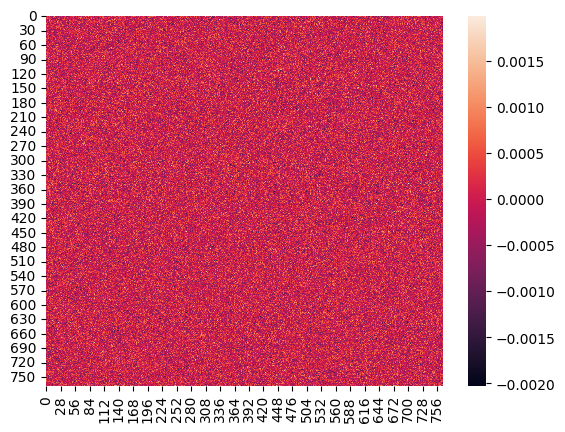

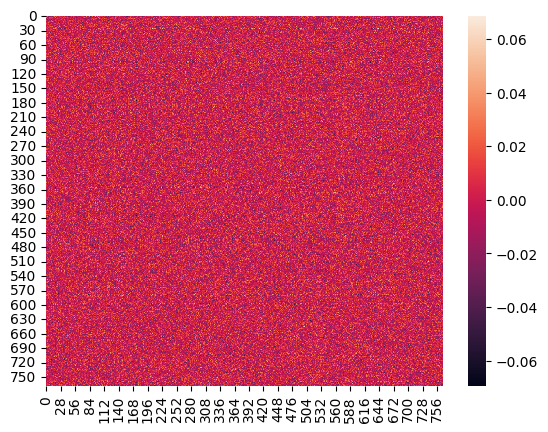

In [35]:
sns.heatmap(W_qk)
plt.show()
sns.heatmap(W_ov)
plt.show()

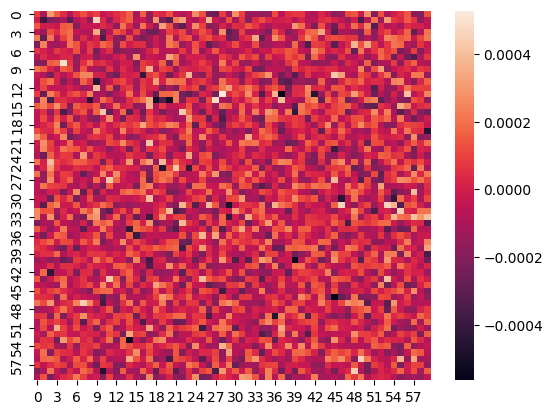

In [36]:
W_qk = W_q.T @ W_k / np.sqrt(d_model)
W_ov = W_o @ W_v
W_qkov = W_qk @ W_ov

sns.heatmap(W_qkov[:60,:60])
plt.show()